<a href="https://colab.research.google.com/github/firmansyahtelco/python/blob/main/TheAssignmentPython3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Assignment of Python Programming (Week-13)** <br>
Pathloss Calculation

In [1]:
#Nama  : Firmansyah
#NIM   : 1101208122
#Kelas : TTX-44-01 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

Graph-1 (Comparation Location Area) <br>
**1800 MHz**

In [7]:
f=1800 #MHz
locationA='urban' 
locationB='suburban'
locationC='open'
tower=80 #meter
user=1.5 #meter
dmin=200 #meter
dmax=700 #meter
N=200    #users
d= np.random.randint(dmin,dmax,N)

In [9]:
LpUrban = cos(f,locationA,tower,user,d)
LpSuburban = cos(f,locationB,tower,user,d)
LpOpen = cos(f,locationC,tower,user,d)

In [10]:
d_sort=d[np.argsort(d)]
Urban_sort = LpUrban[np.argsort(d)]
SubUrban_sort = LpSuburban[np.argsort(d)]
Open_sort = LpOpen[np.argsort(d)]

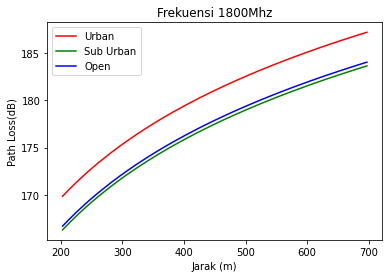

In [11]:
plt.figure()
plt.plot(d_sort,Urban_sort,'r',label='Urban')
plt.plot(d_sort,SubUrban_sort,'g',label='Sub Urban')
plt.plot(d_sort,Open_sort,'b',label='Open')
plt.legend()
plt.title('Frekuensi 1800Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss(dB)')
plt.show()

Graph-2 (Comparation Frequency) <br>
**Urban**

In [13]:
freqA=700 #MHz
freqB=900 #MHz
freqC=1800 #MHz
location='urban' #Area
tower=80 #meter
user=1.5 #meter
dmin=200 #meter
dmax=700 #meter
N=200 #users
d= np.random.randint(dmin,dmax,N)

In [14]:
UrbanfreqA = cos(freqA,location,tower,user,d)
UrbanfreqB = cos(freqB,location,tower,user,d)
UrbanfreqC = cos(freqC,location,tower,user,d)

In [15]:
d_sort=d[np.argsort(d)]
UrbanfreqA_sort = UrbanfreqA[np.argsort(d)]
UrbanfreqB_sort = UrbanfreqB[np.argsort(d)]
UrbanfreqC_sort = UrbanfreqC[np.argsort(d)]

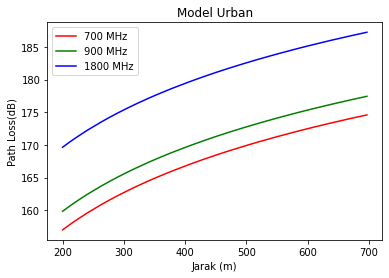

In [16]:
plt.figure()
plt.plot(d_sort,UrbanfreqA_sort,'r',label='700 MHz')
plt.plot(d_sort,UrbanfreqB_sort,'g',label='900 MHz')
plt.plot(d_sort,UrbanfreqC_sort,'b',label='1800 MHz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss(dB)')
plt.show()